# Descriptive Statistics with Penguins

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd
import numpy as np
from IPython.display import Image

## Why statistics?

In [82]:
Image(url= "https://imgs.xkcd.com/comics/boyfriend.png", width = 600)

### Load clean penguin data set

In [5]:
df = pd.read_csv('all_penguins_clean.csv', )

In [31]:
df.head()

,studyName,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Real ID,Sex
0,PAL0708,Adelie,Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,18.7,181.0,3750.0,A_0,MALE
1,PAL0708,Adelie,Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.5,17.4,186.0,3800.0,A_1,FEMALE
2,PAL0708,Adelie,Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195.0,3250.0,A_2,FEMALE
3,PAL0708,Adelie,Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,11/16/07,NaN,NaN,NaN,NaN,A_3,NaN
4,PAL0708,Adelie,Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.7,19.3,193.0,3450.0,A_4,FEMALE


## Types of variables
- Categorical
- Ordinal
- Metric 

## Measures of central tendency and dispersion: for 1 metric variable

In [11]:
df.describe()

,Sample Number,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g)
count,344.000000,342.000000,342.000000,342.000000,342.000000
mean,63.151163,43.921930,17.151170,200.915205,4201.754386
std,40.430199,5.459584,1.974793,14.061714,801.954536
min,1.000000,32.100000,13.100000,172.000000,2700.000000
25%,29.000000,39.225000,15.600000,190.000000,3550.000000
50%,58.000000,44.450000,17.300000,197.000000,4050.000000
75%,95.250000,48.500000,18.700000,213.000000,4750.000000
max,152.000000,59.600000,21.500000,231.000000,6300.000000


In [15]:
df = df.drop(['Sample Number'], axis = 1)

In [16]:
df.describe()

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g)
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


#### Some statistics to calculate for metric variables
- pandas.Series.mean() 	calculates arithmetic mean of a column
- pandas.Series.median() 	calculates median of a column
- pandas.Series.var() 	calculates variance of a column
- pandas.Series.min() 	calculates the minimum of a column
- pandas.Series.quantile() 	calculates quantiles of a column

In [38]:
df['Body Mass (g)'].mean()

4201.754385964912

### Statistical visualization
- What measures of central tendency are used? 
- What can we learn from the different plots?

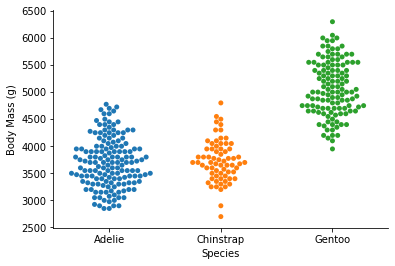

In [58]:
sns.swarmplot(data = df, x = 'Species', y = 'Body Mass (g)')
sns.despine()

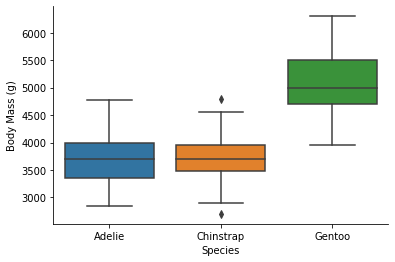

In [44]:
sns.boxplot(data = df, x = 'Species', y = 'Body Mass (g)')
sns.despine()

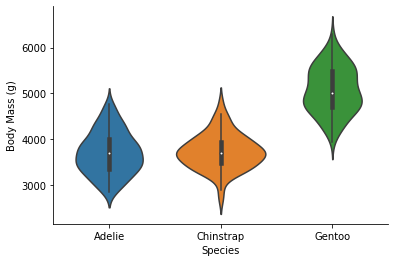

In [49]:
sns.violinplot(data = df, x = 'Species', y = 'Body Mass (g)')
sns.despine()

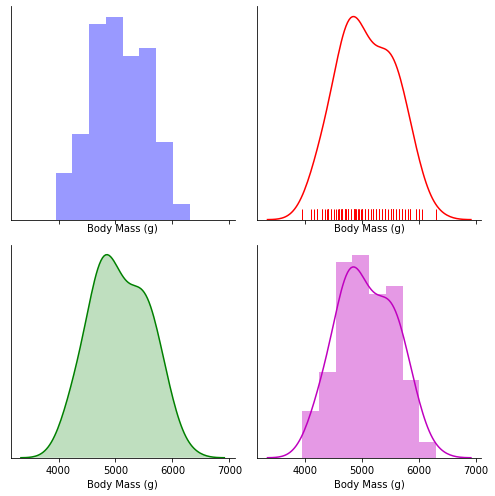

In [77]:
### https://seaborn.pydata.org/examples/distplot_options.html
# Set up the matplotlib figure
f, axes = plt.subplots(2, 2, figsize=(7, 7), sharex=True)
sns.despine()

d = df['Body Mass (g)'].loc[df['Species'] == 'Gentoo']

# Plot a simple histogram with binsize determined automatically
sns.distplot(d, kde=False, color="b", ax=axes[0, 0])

# Plot a kernel density estimate and rug plot
sns.distplot(d, hist=False, rug=True, color="r", ax=axes[0, 1])

# Plot a filled kernel density estimate
sns.distplot(d, hist=False, color="g", kde_kws={"shade": True}, ax=axes[1, 0])

# Plot a histogram and kernel density estimate
sns.distplot(d, color="m", ax=axes[1, 1])

plt.setp(axes, yticks=[])
plt.tight_layout()

### Exercise: explore the shape of the distributions for the other variables in the data set

## For two metric variables

- Let's play to train your eye: http://guessthecorrelation.com/

- Never forget: Correlation doesn't imply causation!

In [84]:
Image(url= "https://imgs.xkcd.com/comics/correlation.png", width = 600)

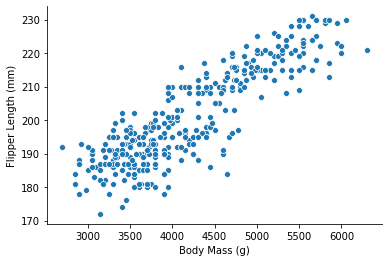

In [73]:
sns.scatterplot(data = df, x = 'Body Mass (g)', y = 'Flipper Length (mm)')
sns.despine()

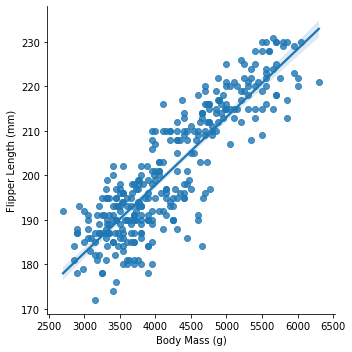

In [72]:
sns.lmplot(data = df, x = 'Body Mass (g)', y = 'Flipper Length (mm)')

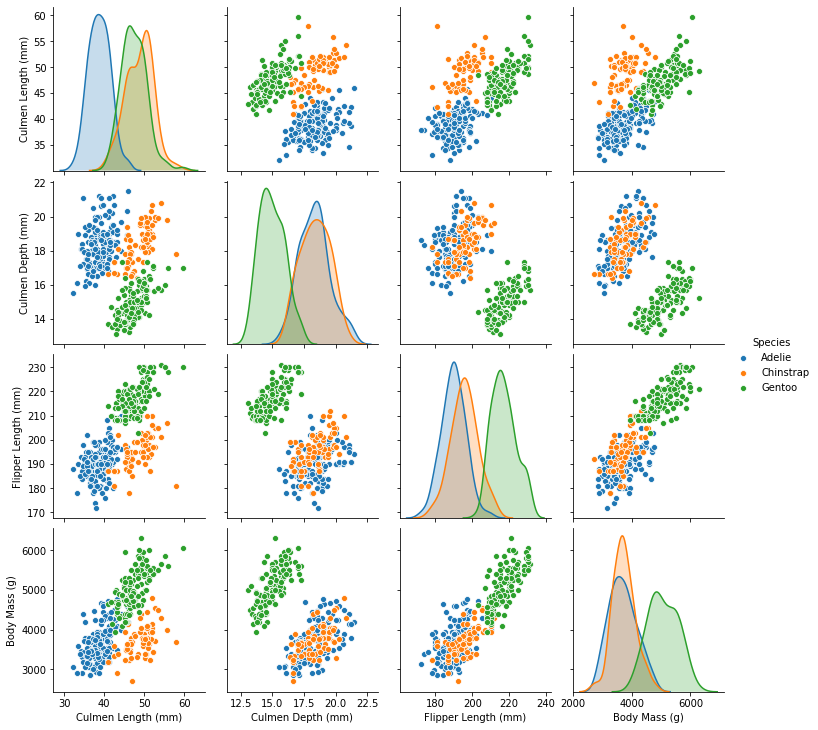

In [63]:
sns.pairplot(data = df, hue = 'Species' )

### For many metric variables

In [80]:
correlations = df.corr()

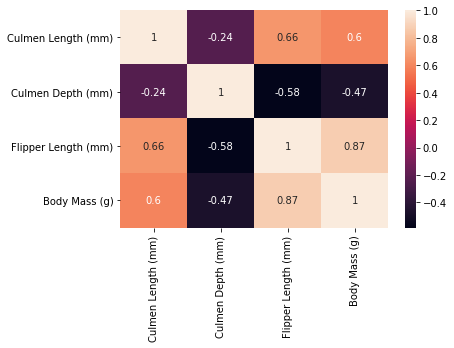

In [81]:
sns.heatmap(correlations, annot=True)

#### Check how correlations change if we take single species, and then single species of the same sex